In [20]:
import networkx as nx

number_of_nodes = 20
init_zombies = 5
G = nx.complete_graph(number_of_nodes)

In [21]:
import random
from nxsim import BaseNetworkAgent

class ZombieOutbreak(BaseNetworkAgent):
    def __init__(self, environment=None, agent_id=0, state=()):
        super().__init__(environment=environment, agent_id=agent_id, state=state)
        self.bite_prob = 0.05

    def run(self):
        while True:
            if self.state['id'] == 1:
                self.zombify()
                yield self.env.timeout(1)
            else:
                yield self.env.event()

    def zombify(self):
        normal_neighbors = self.get_neighboring_agents(state_id=0)
        for neighbor in normal_neighbors:
            if random.random() < self.bite_prob:
                neighbor.state['id'] = 1 # zombie
                print(self.env.now, self.id, neighbor.id, sep='\t')
                break

In [22]:
from nxsim import NetworkSimulation
import numpy as np
# Initialize agent states. Let's assume everyone is normal.
init_states = [{'id': 0, } for _ in range(number_of_nodes)]  # add keys as as necessary, but "id" must always refer to that state category

# Seed a zombie
random_array = np.random.randint(number_of_nodes-1, size=init_zombies)
random_array
for i in random_array:
    init_states[i] = {'id': 1}
sim = NetworkSimulation(topology=G, states=init_states, agent_type=ZombieOutbreak, 
                        max_time=100, num_trials=1, logging_interval=1.0)

In [23]:
sim.run_simulation()

Starting simulations...
---Trial 0---
Setting up agents...
2	4	18
3	13	17
4	4	1
5	4	15
6	13	2
7	3	5
7	4	8
8	13	6
10	4	11
11	13	16
13	13	19
19	13	10
20	3	14
20	13	9
26	13	0
33	4	7
43	4	12
Written 100 items to pickled binary file: sim_01/log.0.state.pickled
Simulation completed.


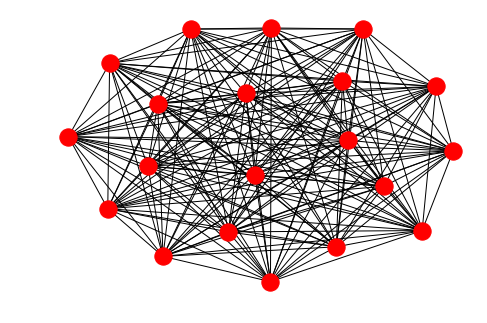

In [24]:
%matplotlib inline
nx.draw(G)

In [13]:
from nxsim import BaseLoggingAgent
trial = BaseLoggingAgent.open_trial_state_history(dir_path='sim_01', trial_id=0)

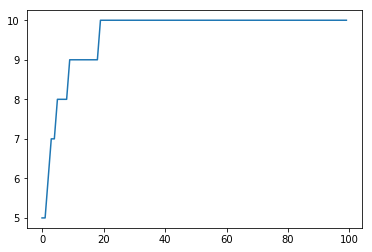

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
zombie_census = [sum([1 for node_id, state in g.items() if state['id'] == 1]) for t,g in trial.items()]
plt.plot(zombie_census)